# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from sklearn.preprocessing import OneHotEncoder

In [3]:
train = pd.read_csv('Datasets/Titanic/train.csv')
test = pd.read_csv('Datasets/Titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.duplicated().sum()

0

# Data Pre-Processing

### Columns Creation

In [7]:
train['Cabin_class'] = train['Cabin'].str[0]
train['Cabin_class'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [8]:
train['Cabin_number'] = train['Cabin'].str[1:].str.strip()
train['Cabin_number'].unique()

array([nan, '85', '123', '46', '6', '103', '56', '23 C25 C27', '78', '33',
       '30', '52', '28', '83', 'G73', '31', '5', '10 D12', '26', '110',
       '58 B60', '101', 'E69', '47', '86', '2', '19', '7', '49', '4',
       '32', '80', '36', '15', '93', '35', '87', '77', '67', '94', '125',
       '99', '118', '', '22 C26', '106', '65', '54', '57 B59 B63 B66',
       '34', '18', '124', '91', '40', '128', '37', '50', '82', '96 B98',
       '10', '44', '104', '111', '92', '38', '21', '12', '63', '14', '20',
       '79', '25', '73', '95', '39', '22', '70', '16', '68', '41', '9',
       '23', '48', '58', '126', '71', '51 B53 B55', 'G63', '62 C64', '24',
       '90', '45', '8', '121', '11', '3', '82 B84', '17', '102', '69',
       '42', '148'], dtype=object)

In [9]:
train.drop(columns='Cabin',inplace=True)

In [10]:
train['Family_size'] = train.SibSp + train.Parch

### Fill Null Values

In [11]:
print(train['Age'].skew())

0.38910778230082704


In [12]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

C:\Users\rraks\AppData\Local\Temp\ipykernel_8516\900713126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(),inplace=True)


In [13]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

C:\Users\rraks\AppData\Local\Temp\ipykernel_8516\417421274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)


In [14]:
#train['Cabin_number'].fillna(train['Cabin_number'].mode()[0],inplace=True)
train['Cabin_number'].fillna(0,inplace=True)

C:\Users\rraks\AppData\Local\Temp\ipykernel_8516\278446268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Cabin_number'].fillna(0,inplace=True)


In [15]:
#train['Cabin_class'].fillna(train['Cabin_class'].mode()[0],inplace=True)
train['Cabin_class'].fillna(0,inplace=True)

C:\Users\rraks\AppData\Local\Temp\ipykernel_8516\3786326803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Cabin_class'].fillna(0,inplace=True)


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    object 
 11  Cabin_class   891 non-null    object 
 12  Cabin_number  891 non-null    object 
 13  Family_size   891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


### Datatype check

In [17]:
train['Survived'] = pd.Categorical(train['Survived'])
train['Pclass'] = pd.Categorical(train['Pclass'])
train['Sex'] = pd.Categorical(train['Sex'])
train['Embarked'] = pd.Categorical(train['Embarked'])
train['PassengerId'] = pd.Categorical(train['PassengerId'])
train['Cabin_class'] = pd.Categorical(train['Cabin_class'])
train['Cabin_number'] = pd.Categorical(train['Cabin_number'])

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    category
 1   Survived      891 non-null    category
 2   Pclass        891 non-null    category
 3   Name          891 non-null    object  
 4   Sex           891 non-null    category
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Embarked      891 non-null    category
 11  Cabin_class   891 non-null    category
 12  Cabin_number  891 non-null    category
 13  Family_size   891 non-null    int64   
dtypes: category(7), float64(2), int64(3), object(2)
memory usage: 100.8+ KB


### Catcoding

In [19]:
train['PassengerId'] = train['PassengerId'].cat.codes
train['PassengerId'] = pd.Categorical(train['PassengerId'])

train['Pclass'] = train['Pclass'].cat.codes
train['Pclass'] = pd.Categorical(train['Pclass'])

train['Sex'] = train['Sex'].cat.codes
train['Sex'] = pd.Categorical(train['Sex'])

train['Embarked'] = train['Embarked'].cat.codes
train['Embarked'] = pd.Categorical(train['Embarked'])

train['Cabin_class'] = train['Cabin_class'].cat.codes
train['Cabin_class'] = pd.Categorical(train['Cabin_class'])

train['Cabin_number'] = train['Cabin_number'].cat.codes
train['Cabin_number'] = pd.Categorical(train['Cabin_number'])

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    category
 1   Survived      891 non-null    category
 2   Pclass        891 non-null    category
 3   Name          891 non-null    object  
 4   Sex           891 non-null    category
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Embarked      891 non-null    category
 11  Cabin_class   891 non-null    category
 12  Cabin_number  891 non-null    category
 13  Family_size   891 non-null    int64   
dtypes: category(7), float64(2), int64(3), object(2)
memory usage: 80.8+ KB


# Corelation Graph

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin_class', 'Cabin_number',
       'Family_size'],
      dtype='object')

In [22]:
train_corr = train[[
                    'PassengerId',
                    'Survived',
                    'Pclass',
                    #'Name',
                    'Sex',
                    'Age',
                    'SibSp',
                    'Parch',
                    #'Ticket',
                    'Fare',
                    'Embarked',
                    'Cabin_class',
                    'Cabin_number',
                    'Family_size'
                    ]]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 1, 'PassengerId'),
  Text(1.5, 1, 'Survived'),
  Text(2.5, 1, 'Pclass'),
  Text(3.5, 1, 'Sex'),
  Text(4.5, 1, 'Age'),
  Text(5.5, 1, 'SibSp'),
  Text(6.5, 1, 'Parch'),
  Text(7.5, 1, 'Fare'),
  Text(8.5, 1, 'Embarked'),
  Text(9.5, 1, 'Cabin_class'),
  Text(10.5, 1, 'Cabin_number'),
  Text(11.5, 1, 'Family_size')])

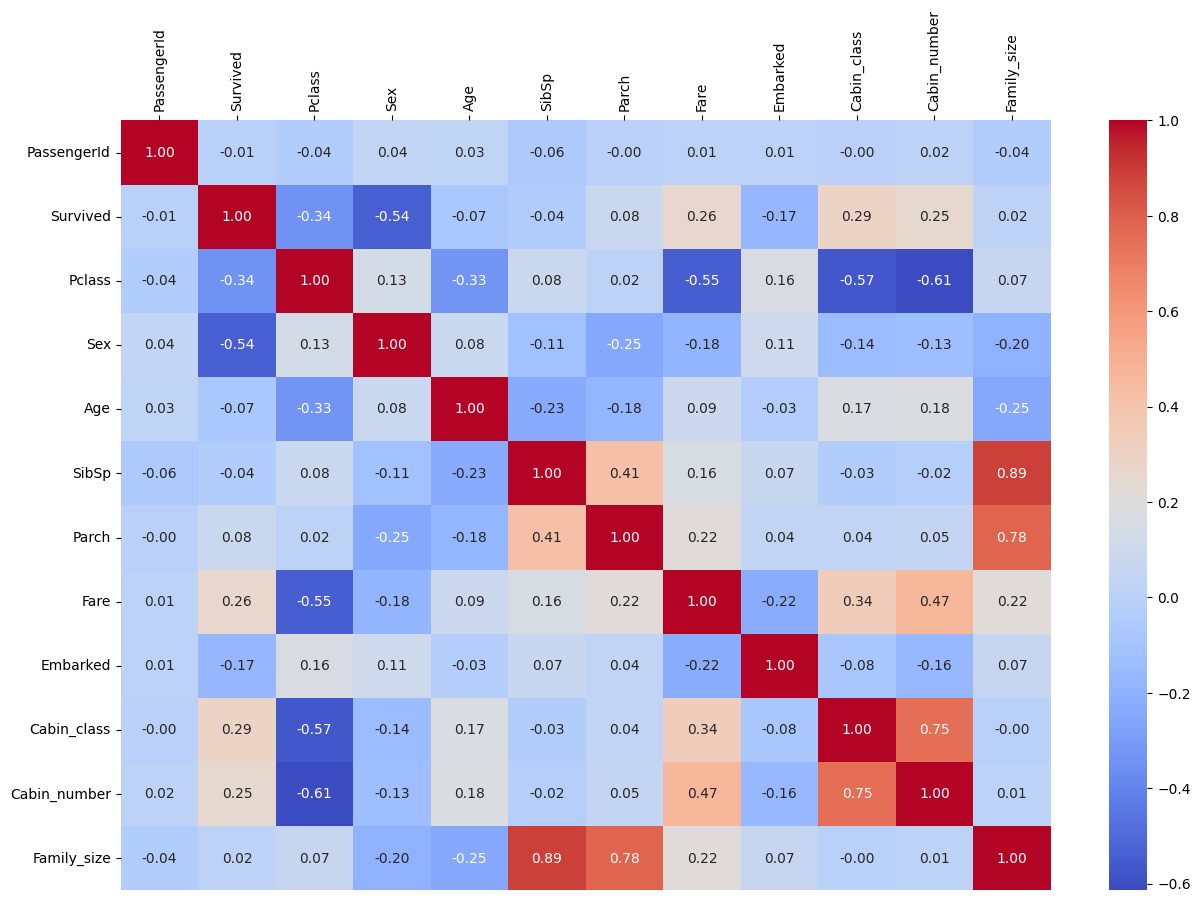

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(train_corr.corr(),annot=True, fmt = '.2f',cmap = 'coolwarm').xaxis.tick_top()
plt.xticks(rotation = 90)

In [24]:
train_corr.corr().sort_values(by='Survived', ascending=False)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_class,Cabin_number,Family_size
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675,0.287944,0.254173,0.016639
Cabin_class,-0.000483,0.287944,-0.570691,-0.143517,0.169076,-0.031973,0.037621,0.337525,-0.080523,1.000000,0.750408,-0.003057
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719,0.337525,0.468860,0.217138
Cabin_number,0.016222,0.254173,-0.614578,-0.132017,0.177330,-0.019878,0.051112,0.468860,-0.161827,0.750408,1.000000,0.011948
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798,0.037621,0.051112,0.783111
Family_size,-0.040143,0.016639,0.065997,-0.200988,-0.248512,0.890712,0.783111,0.217138,0.066516,-0.003057,0.011948,1.000000
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128,-0.000483,0.016222,-0.040143
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230,-0.031973,-0.019878,0.890712
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749,0.169076,0.177330,-0.248512
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000,-0.080523,-0.161827,0.066516


# Fearure Selection

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin_class', 'Cabin_number',
       'Family_size'],
      dtype='object')

In [26]:
Features, Target = train[[
                        #'PassengerId',
                        #'Survived',
                        'Pclass',
                        #'Name',
                        'Sex',
                        #'Age',
                        #'SibSp',
                        #'Parch',
                        #'Ticket',
                        'Fare',
                        'Embarked',
                        'Cabin_class',
                        'Cabin_number',
                        #'Family_size'
                          ]], train['Survived']

# One hot encoding

In [27]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [28]:
col_dummy = ['Pclass','Sex','Embarked','Cabin_class','Cabin_number']

In [29]:
encoded_array = encoder.fit_transform(train[col_dummy])
encoded_array

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [30]:
encoded_columns = encoder.get_feature_names_out(col_dummy)
encoded_columns

array(['Pclass_0', 'Pclass_1', 'Pclass_2', 'Sex_0', 'Sex_1', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Cabin_class_0', 'Cabin_class_1',
       'Cabin_class_2', 'Cabin_class_3', 'Cabin_class_4', 'Cabin_class_5',
       'Cabin_class_6', 'Cabin_class_7', 'Cabin_class_8',
       'Cabin_number_0', 'Cabin_number_1', 'Cabin_number_2',
       'Cabin_number_3', 'Cabin_number_4', 'Cabin_number_5',
       'Cabin_number_6', 'Cabin_number_7', 'Cabin_number_8',
       'Cabin_number_9', 'Cabin_number_10', 'Cabin_number_11',
       'Cabin_number_12', 'Cabin_number_13', 'Cabin_number_14',
       'Cabin_number_15', 'Cabin_number_16', 'Cabin_number_17',
       'Cabin_number_18', 'Cabin_number_19', 'Cabin_number_20',
       'Cabin_number_21', 'Cabin_number_22', 'Cabin_number_23',
       'Cabin_number_24', 'Cabin_number_25', 'Cabin_number_26',
       'Cabin_number_27', 'Cabin_number_28', 'Cabin_number_29',
       'Cabin_number_30', 'Cabin_number_31', 'Cabin_number_32',
       'Cabin_number_33', 'Ca

In [31]:
encoded_df = pd.DataFrame(encoded_array,columns=encoded_columns)

In [32]:
Features = Features.drop(columns=col_dummy,inplace=True)

C:\Users\rraks\AppData\Local\Temp\ipykernel_8516\458337912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features = Features.drop(columns=col_dummy,inplace=True)


In [33]:
Features = pd.concat([Features,encoded_df],axis = 1)

In [34]:
Features

,Pclass_0,Pclass_1,Pclass_2,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Cabin_class_0,Cabin_class_1,...,Cabin_number_92,Cabin_number_93,Cabin_number_94,Cabin_number_95,Cabin_number_96,Cabin_number_97,Cabin_number_98,Cabin_number_99,Cabin_number_100,Cabin_number_101
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Spliting Data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(Features,Target,test_size=0.2, random_state=47)

# Logistic Regression

In [36]:
model = LogisticRegression(random_state=47)
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.776536312849162

In [38]:
cv = cross_val_score(model,Features,Target)
cv_score = cv.mean()

<Axes: >

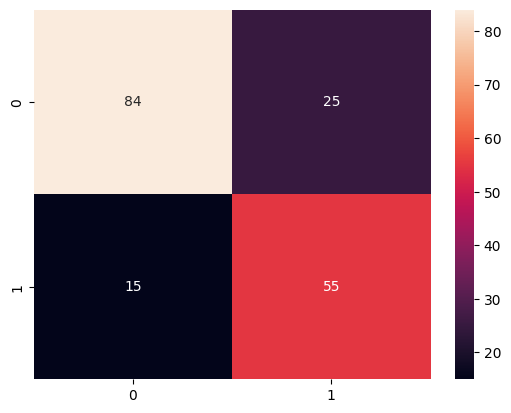

In [39]:
confusion = confusion_matrix(y_test,predictions)
sns.heatmap(confusion,annot=True)

In [40]:
performance = pd.DataFrame(columns=['model','accuracy_score','cv_score'])
performance

,model,accuracy_score,cv_score


In [41]:
performance = performance._append({'model' : model,
                    'accuracy_score': accuracy,
                    'cv_score' : cv_score},ignore_index=True)
performance.sort_values(by='cv_score',ascending=False)

C:\Users\rraks\AppData\Local\Temp\ipykernel_8516\1226628523.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance = performance._append({'model' : model,


,model,accuracy_score,cv_score
0,LogisticRegression(random_state=47),0.776536,0.775545


# Gradient Boosted Regressor

In [42]:
n_iter_val = 10
cv_val = 5

In [43]:
model = GradientBoostingClassifier(random_state=47)
grid = {
    'n_estimators':[50,100,200,300,400,500,600,700,800,900,1000],
    'max_depth':[5,10,20,30,40,50,60,70,80,90,100],
    'min_samples_split':[5,10,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100,110],
    'learning_rate':[0.001, 0.01, 0.1, 0.5, 1]
}
bs_gb = BayesSearchCV(estimator=model,
                   search_spaces=grid,
                   n_iter=n_iter_val,
                   cv=cv_val)
bs_gb.fit(x_train,y_train)

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=47),
              n_iter=10,
              search_spaces={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                             'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                           90, 100],
                             'min_samples_leaf': [5, 10, 20, 30, 40, 50, 60, 70,
                                                  80, 90, 100, 110],
                             'min_samples_split': [5, 10, 20, 30, 40, 50, 60,
                                                   70, 80, 90, 100],
                             'n_estimators': [50, 100, 200, 300, 400, 500, 600,
                                              700, 800, 900, 1000]})

In [44]:
bs_gb.best_score_

0.817393873731902

In [45]:
bs_gb.best_score_

0.817393873731902

In [46]:
predictions = bs_gb.best_estimator_.predict(x_test)

In [47]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7988826815642458

<Axes: >

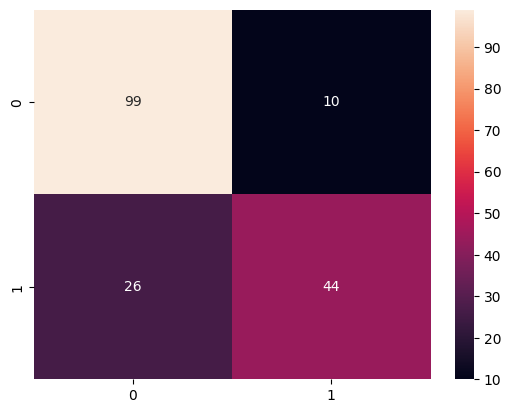

In [48]:
confusion = confusion_matrix(y_test,predictions)
sns.heatmap(confusion,annot=True)

<Axes: >

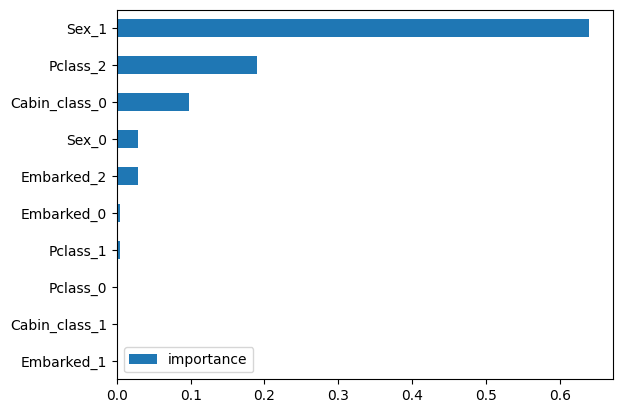

In [49]:
fi = pd.DataFrame(data=bs_gb.best_estimator_.feature_importances_,
                  index=bs_gb.best_estimator_.feature_names_in_,
                  columns=['importance'])
fi.head(10).sort_values(by='importance',ascending=True).plot(kind='barh')

In [50]:
performance = performance._append({'model' : model,
                    'accuracy_score': accuracy,
                    'cv_score': bs_gb.best_score_},ignore_index=True)
performance.sort_values(by='cv_score',ascending=False)

,model,accuracy_score,cv_score
1,GradientBoostingClassifier(random_state=47),0.798883,0.817394
0,LogisticRegression(random_state=47),0.776536,0.775545


# Xgboost Classifier

In [51]:
model = XGBClassifier(enable_categorical = True,random_state=47)
grid = {
    'n_estimators':[50,100,200,300,400,500,600,700,800,900,1000],
    'max_depth':[5,10,20,30,40,50,60,70,80,90,100],
    #'min_samples_split':[5,10,20,30,40,50,60,70,80,90,100],
    #'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100,110],
    'learning_rate':[0.001, 0.01, 0.1, 0.5, 1]
}
bs_xgb = BayesSearchCV(estimator=model,
                   search_spaces=grid,
                   n_iter=n_iter_val,
                   cv=cv_val)
bs_xgb.fit(x_train,y_train)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=True, eval_metric=None,
                                      feature_types=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None,...
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=47, ...),
              n_iter=10,
              search_spaces={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                             'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                           90, 100],
                             'n_estimators': [50, 100, 200, 300, 400, 500, 600,
                                              700, 800, 900, 1000]})

In [52]:
bs_xgb.best_params_

OrderedDict([('learning_rate', 0.001),
             ('max_depth', 80),
             ('n_estimators', 1000)])

In [53]:
bs_xgb.best_score_

0.8005023145868216

In [54]:
predictions = bs_xgb.best_estimator_.predict(x_test)

In [55]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8100558659217877

<Axes: >

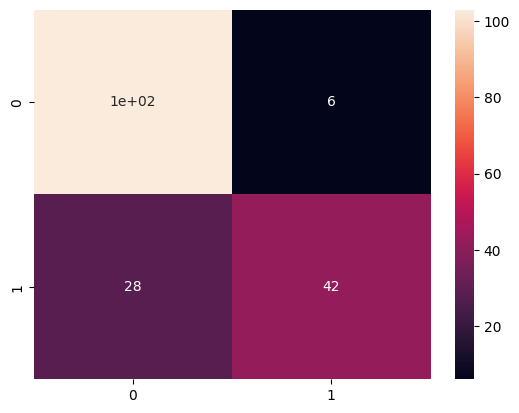

In [56]:
confusion = confusion_matrix(y_test,predictions)
sns.heatmap(confusion,annot=True)

<Axes: >

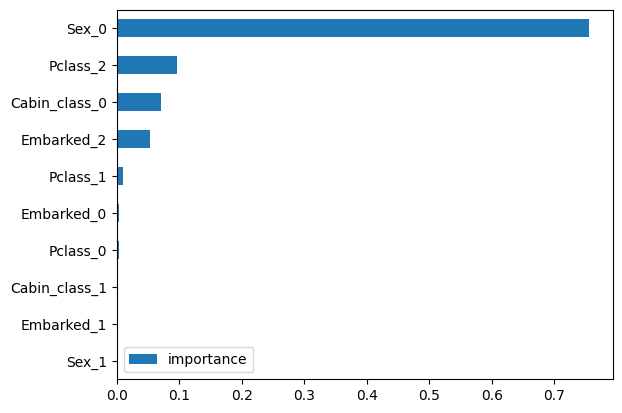

In [57]:
fi = pd.DataFrame(data=bs_xgb.best_estimator_.feature_importances_,
                  index=bs_xgb.best_estimator_.feature_names_in_,
                  columns=['importance'])
fi.head(10).sort_values(by='importance',ascending=True).plot(kind='barh')

In [58]:
performance = performance._append({'model' : model,
                    'accuracy_score': accuracy,
                    'cv_score': bs_xgb.best_score_},ignore_index=True)
performance.sort_values(by='cv_score',ascending=False)

,model,accuracy_score,cv_score
1,GradientBoostingClassifier(random_state=47),0.798883,0.817394
2,"XGBClassifier(base_score=None, booster=None, c...",0.810056,0.800502
0,LogisticRegression(random_state=47),0.776536,0.775545


# Random Forest Classifier

In [59]:
model = RandomForestClassifier(random_state=47)
grid = {
    'n_estimators':[50,100,200,300,400,500,600,700,800,900,1000],
    'max_depth':[5,10,20,30,40,50,60,70,80,90,100],
    'min_samples_split':[5,10,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100,110]
    #'learning_rate':[0.001, 0.01, 0.1, 0.5, 1]
}
bs_rf = BayesSearchCV(estimator=model,
                   search_spaces=grid,
                   n_iter=n_iter_val,
                   cv=cv_val)
bs_rf.fit(x_train,y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=47),
              n_iter=10,
              search_spaces={'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                           90, 100],
                             'min_samples_leaf': [5, 10, 20, 30, 40, 50, 60, 70,
                                                  80, 90, 100, 110],
                             'min_samples_split': [5, 10, 20, 30, 40, 50, 60,
                                                   70, 80, 90, 100],
                             'n_estimators': [50, 100, 200, 300, 400, 500, 600,
                                              700, 800, 900, 1000]})

In [60]:
bs_rf.best_params_

OrderedDict([('max_depth', 90),
             ('min_samples_leaf', 5),
             ('min_samples_split', 20),
             ('n_estimators', 200)])

In [61]:
bs_rf.best_score_

0.8117502216093767

In [62]:
predictions = bs_rf.best_estimator_.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8212290502793296

<Axes: >

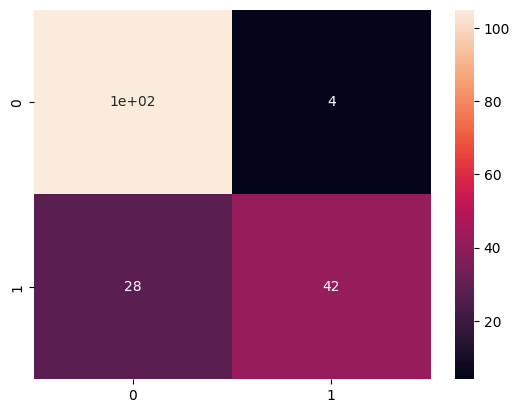

In [64]:
confusion = confusion_matrix(y_test,predictions)
sns.heatmap(confusion,annot=True)

<Axes: >

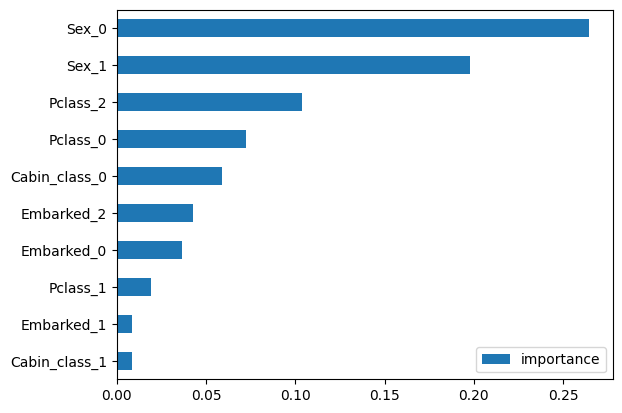

In [65]:
fi = pd.DataFrame(data=bs_rf.best_estimator_.feature_importances_,
                  index=bs_rf.best_estimator_.feature_names_in_,
                  columns=['importance'])
fi.head(10).sort_values(by='importance',ascending=True).plot(kind='barh')

In [66]:
performance = performance._append({'model' : model,
                    'accuracy_score': accuracy,
                    'cv_score': bs_rf.best_score_
                    },ignore_index=True)
performance.sort_values(by='cv_score',ascending=False)

,model,accuracy_score,cv_score
1,GradientBoostingClassifier(random_state=47),0.798883,0.817394
3,RandomForestClassifier(random_state=47),0.821229,0.811750
2,"XGBClassifier(base_score=None, booster=None, c...",0.810056,0.800502
0,LogisticRegression(random_state=47),0.776536,0.775545
